# 준비

In [1]:
import os                           # 운영체제
import tensorflow as tf             # 텐서플로
import MSRL                         # Musical Symbol Recognition Library

c:\Users\chorokmoo_win\.conda\envs\new2\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\chorokmoo_win\.conda\envs\new2\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issu

In [2]:
# 사용 가능한 모든 GPU 리스트
gpus = tf.config.list_physical_devices('GPU')

# 사용할 프로세서 선택 : GPU
if gpus:
    try: tf.config.set_visible_devices(gpus[0], 'GPU')
    except RuntimeError as e: print(e)

In [3]:
# 데이터셋
msDataset = MSRL.datasets.MusicalSymbolDataset()
train, valid, test = msDataset.ds_OD()

-- TFDS Train ------------------
input  : (20000,), <dtype: 'string'>
output : (20000, 70), <dtype: 'int16'>
---------------------------------
total number of labels : 20000
number of each class : [20000, 20000, 12451, 9883, 11304, 7421, 9873, 12310, 10638, 11838]

-- TFDS Validation ------------------
input  : (2000,), <dtype: 'string'>
output : (2000, 70), <dtype: 'int16'>
---------------------------------
total number of labels : 2000
number of each class : [2000, 2000, 1250, 1015, 1105, 733, 1006, 1276, 1101, 1191]

-- TFDS Test ------------------
input  : (2000,), <dtype: 'string'>
output : (2000, 70), <dtype: 'int16'>
---------------------------------
total number of labels : 2000
number of each class : [2000, 2000, 1222, 987, 1081, 795, 993, 1223, 1067, 1167]



In [4]:
# 모델
msModel = MSRL.models.MusicalSymbolModel()
model = tf.keras.models.load_model(os.path.join('.', 'models', 'model_OD3.h5'), compile=False)

# 테스트

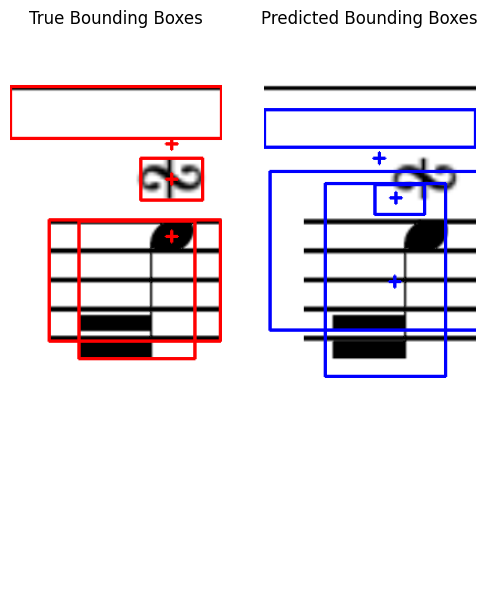

In [21]:
# test 데이터셋
for input in test.take(1):
    image = input[0]
    true = input[1]
    pred = model(input[0])

# 미리보기
MSRL.datasets.preview(image, true, pred)

# 악보인식

In [4]:
classes = [ 
    'note',
    'accidental',
    'articulation',
    'dynamic',
    'octave',
    'ornament',
    'repetition',
    'clef',
    'key',
    'measure',
    'rest',
    'time'
]

In [5]:
def load_images(dir):
    image = tf.io.read_file(dir)                            # 이미지 파일을 읽음
    image = tf.image.decode_image(image, channels=1)        # 이미지 디코딩 (JPEG/PNG 지원)
    image = tf.image.convert_image_dtype(image, tf.float32) # 0~1 범위로 정규화
    return image

In [6]:
# 데이터셋 폴더
dir = os.path.join('..', '..', 'output_images')

# 텐서플로 데이터셋 생성
ds = tf.data.Dataset.list_files(os.path.join(dir, '*.png'))
ds = ds.map(load_images)
ds = ds.batch(batch_size=32)
ds = ds.cache()  # 데이터를 캐싱하여 재로딩 시간 단축
ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)  # 데이터 로드를 미리 준비

In [20]:
# 예측결과
image = []
pred = []

# 모델 입력
for input in ds:
    image.append(input)
    pred.append(model(input))

# 여러 배치 합치기
image = tf.concat(image, axis=0)
pred = tf.concat(pred, axis=0)

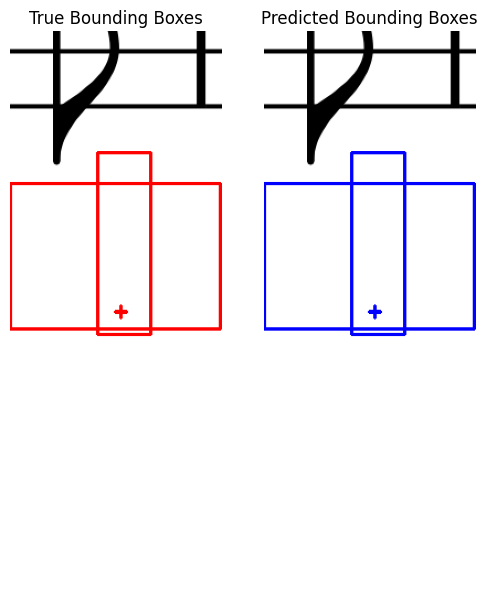

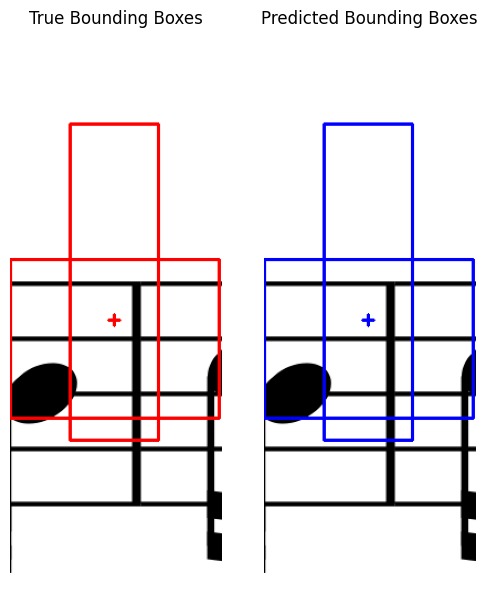

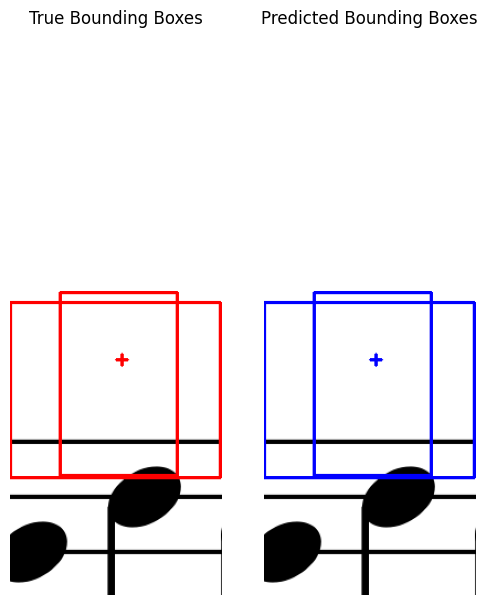

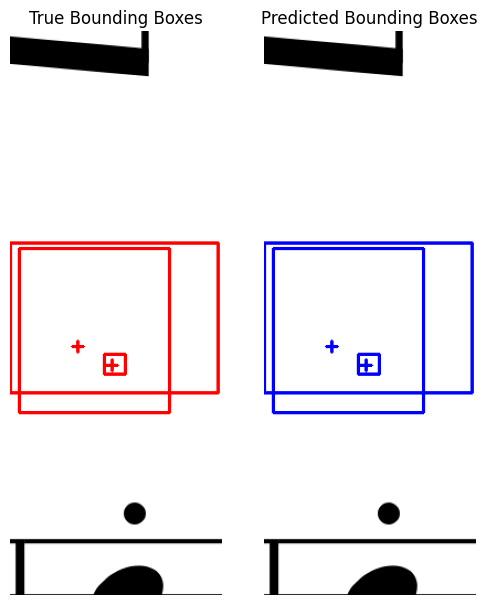

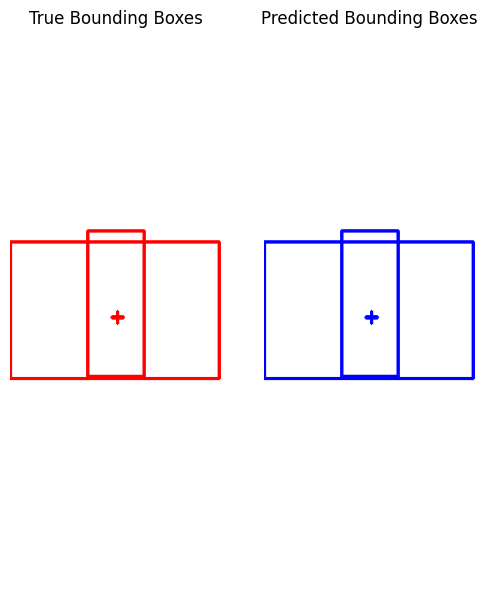

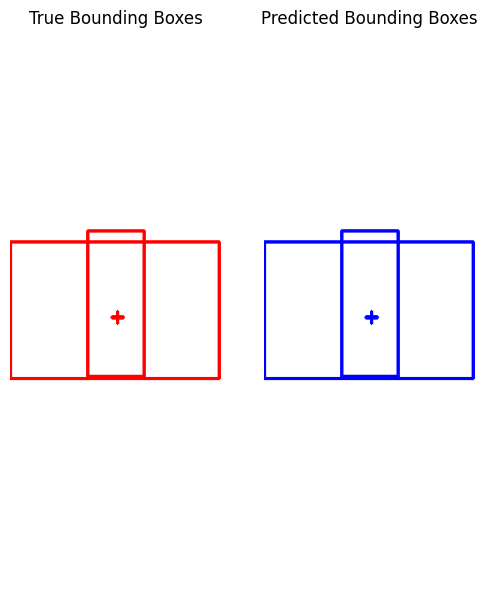

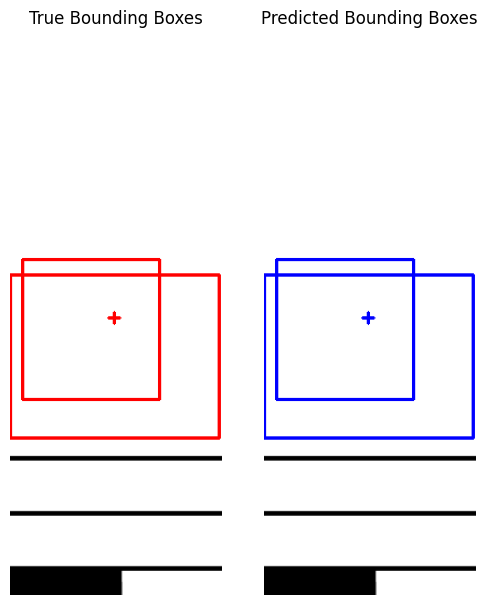

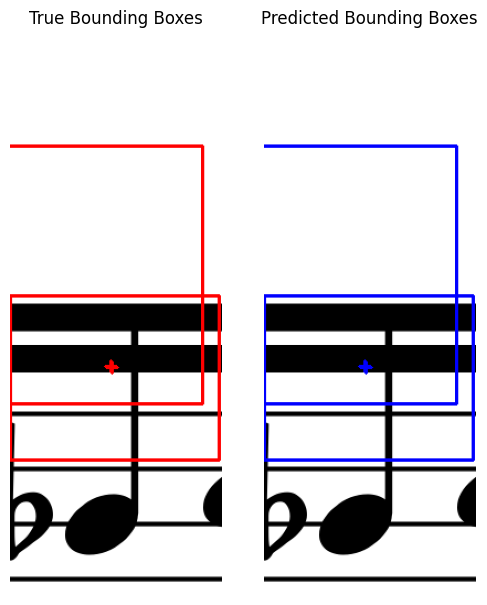

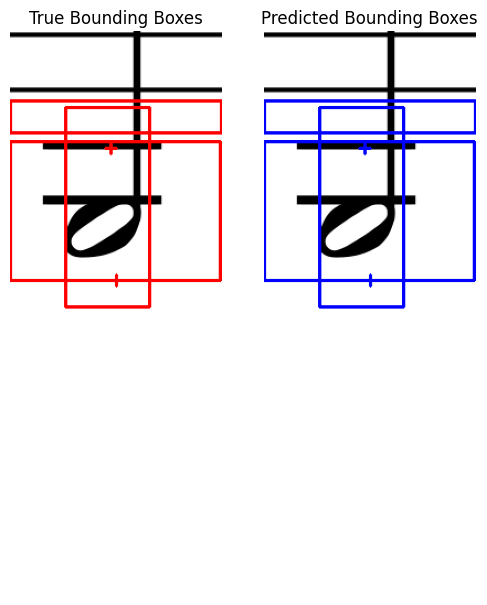

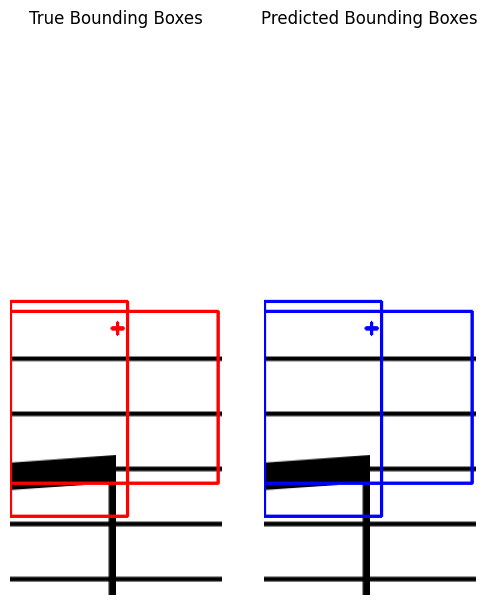

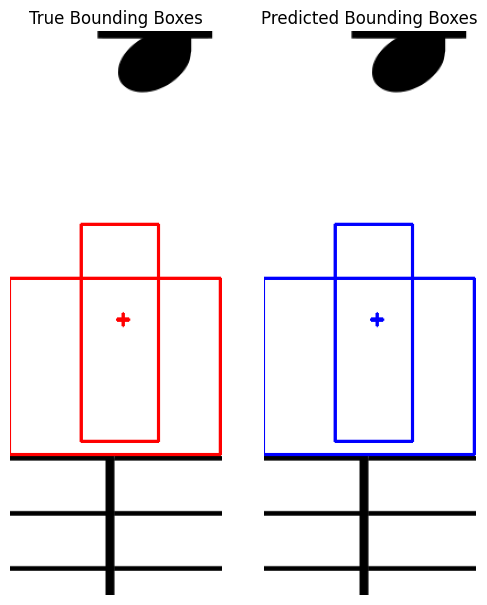

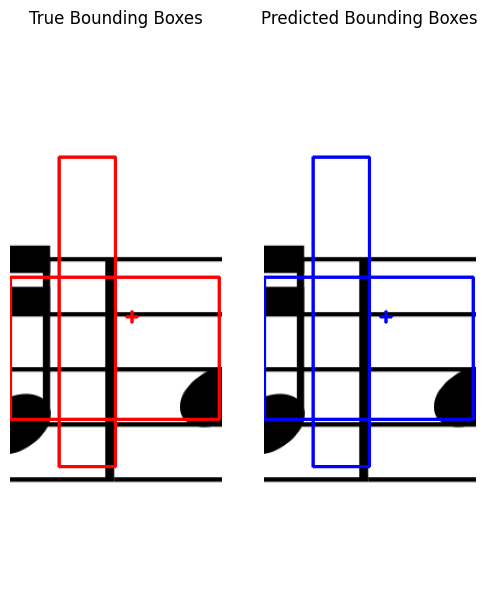

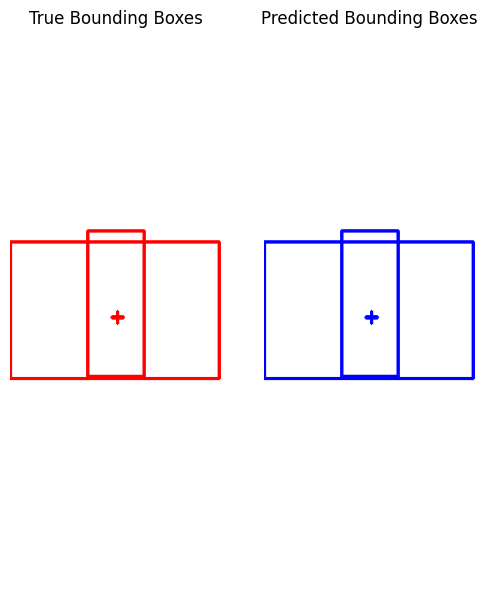

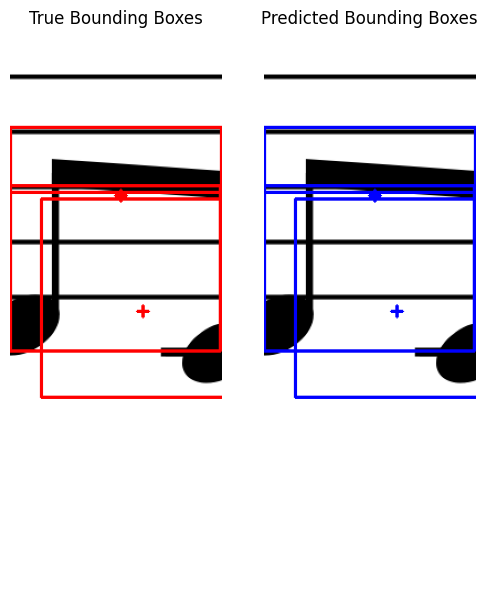

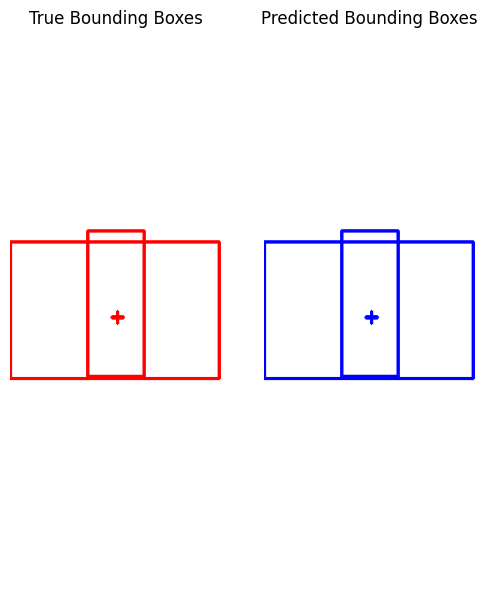

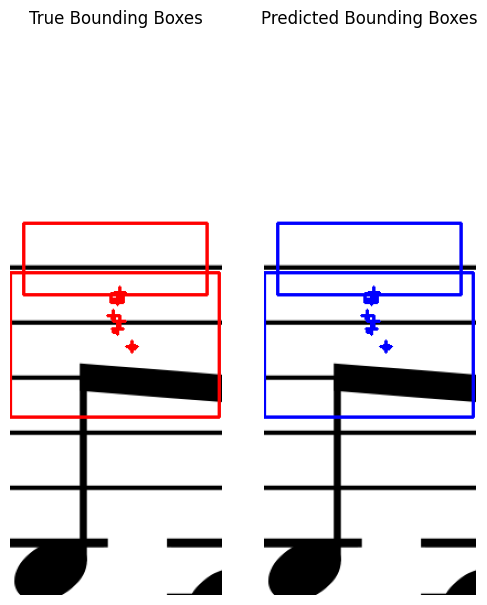

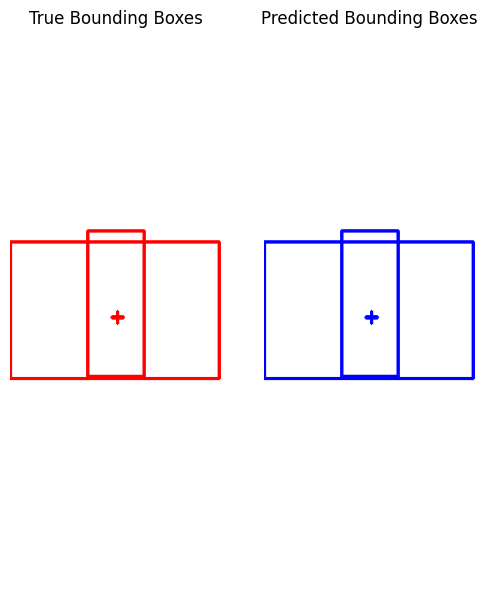

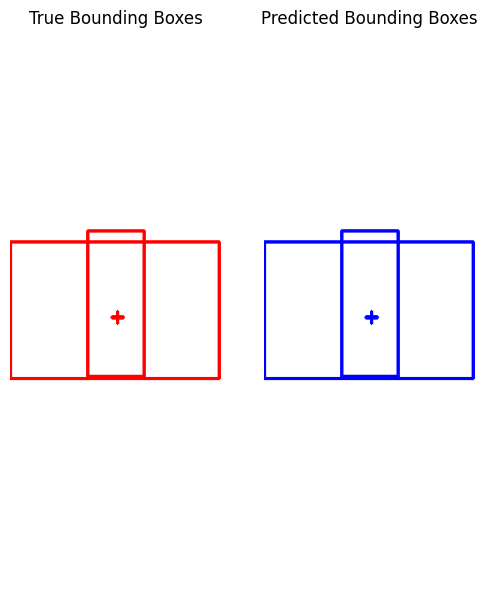

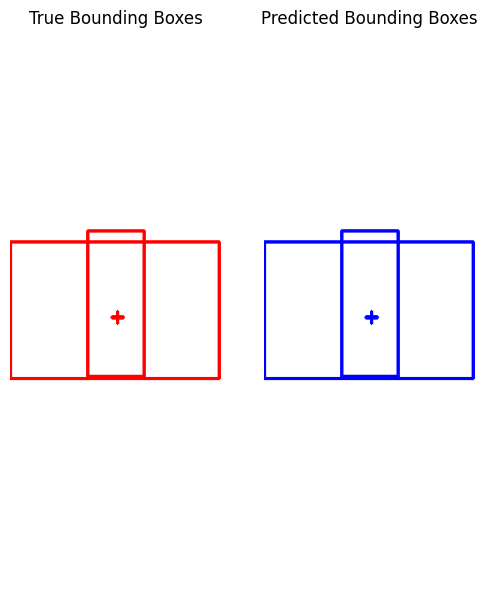

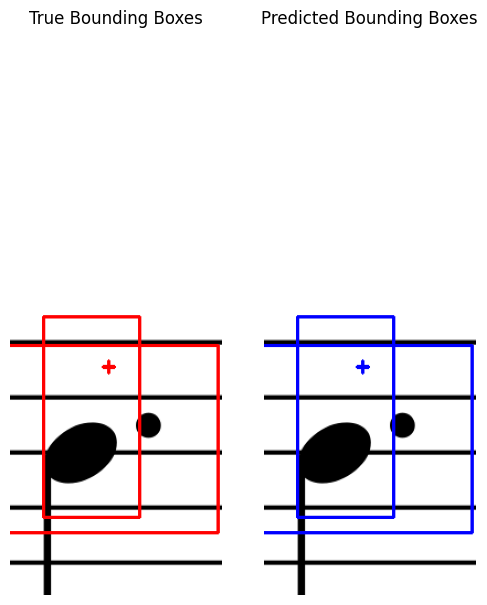

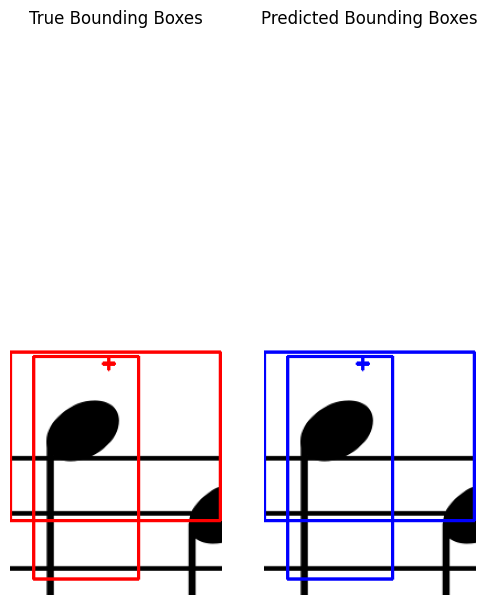

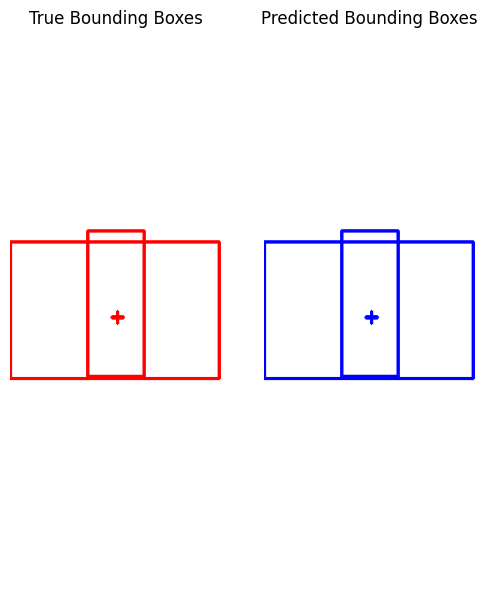

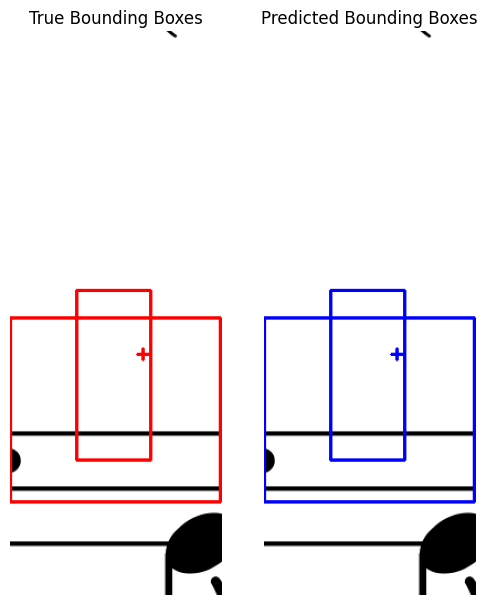

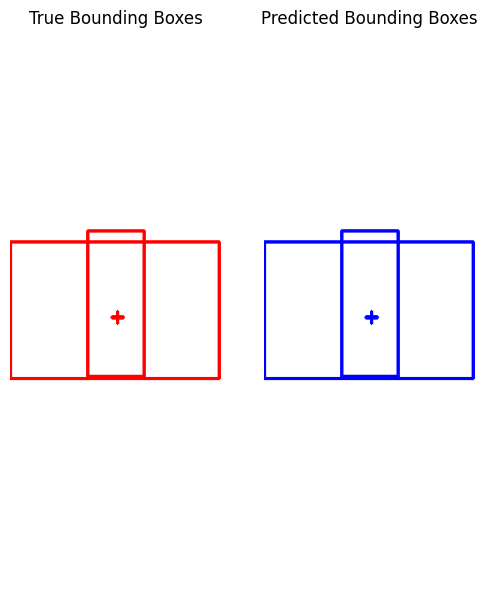

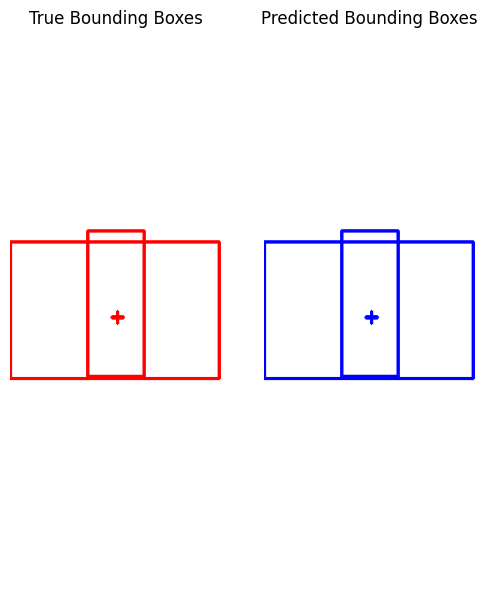

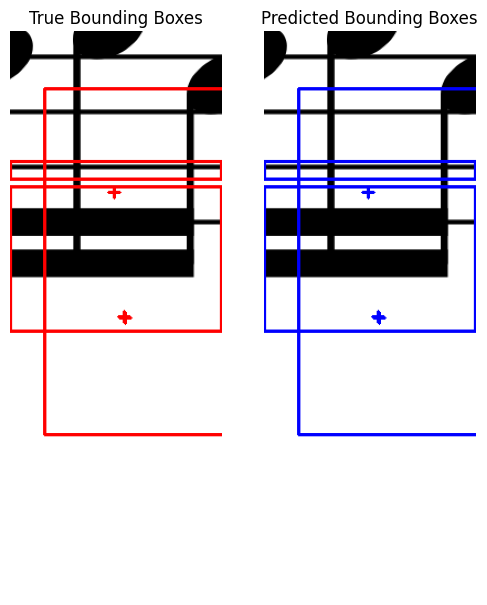

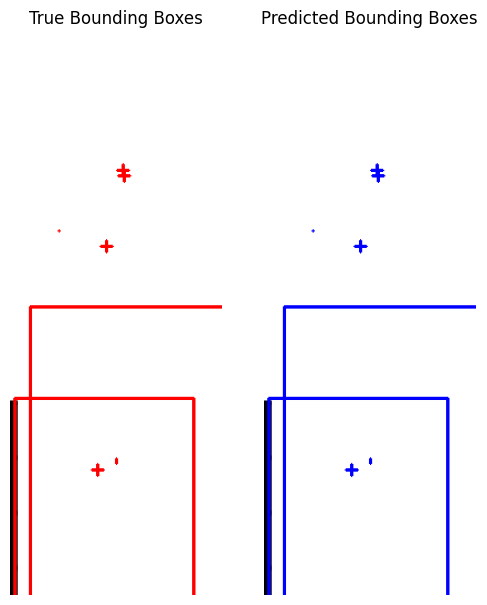

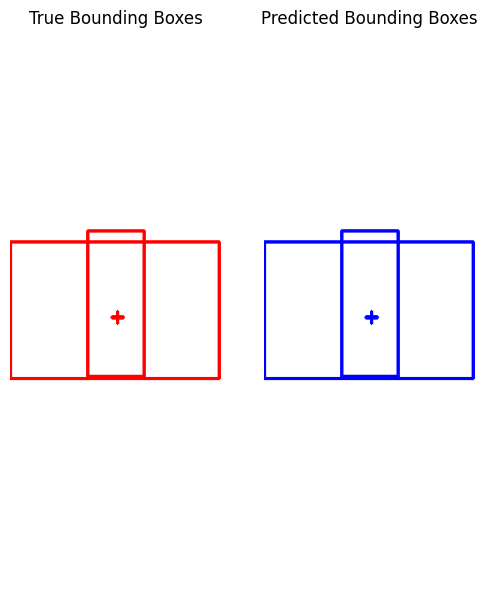

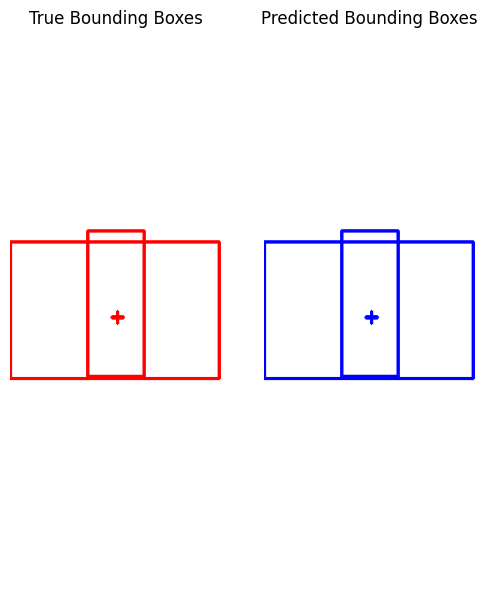

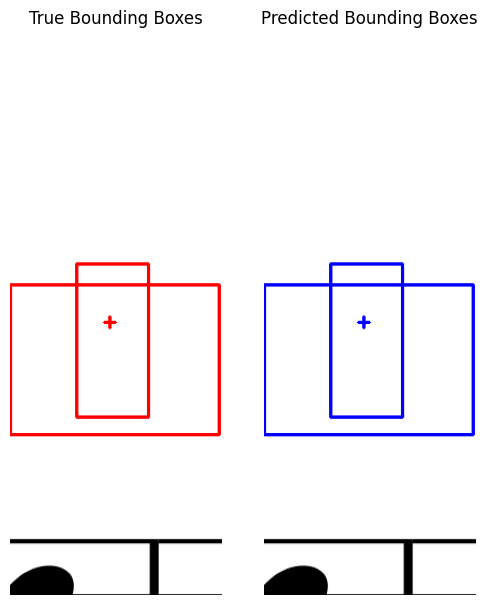

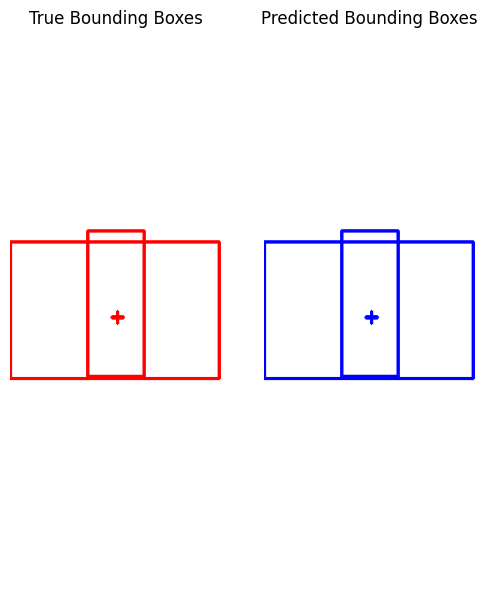

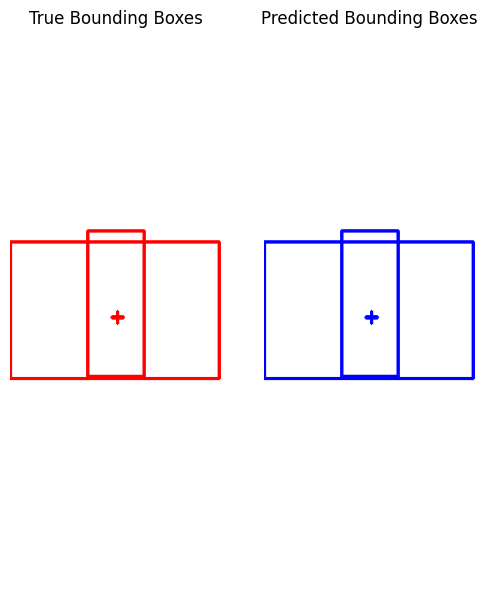

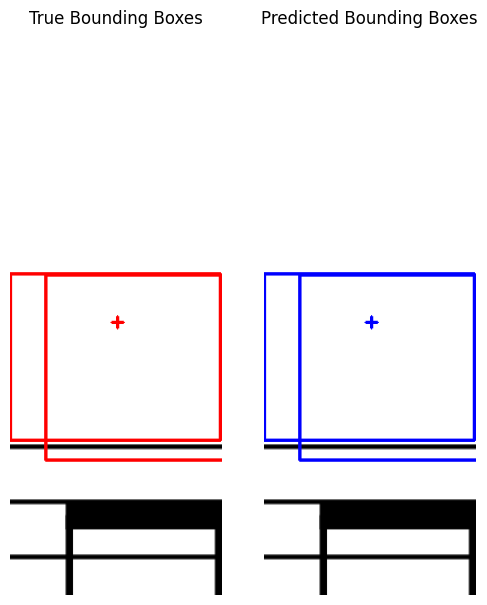

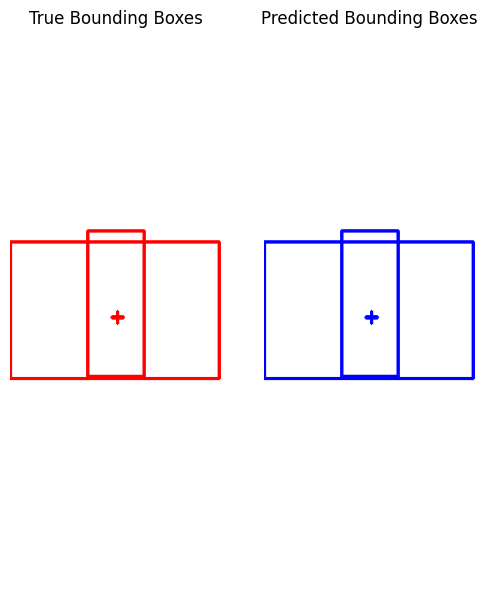

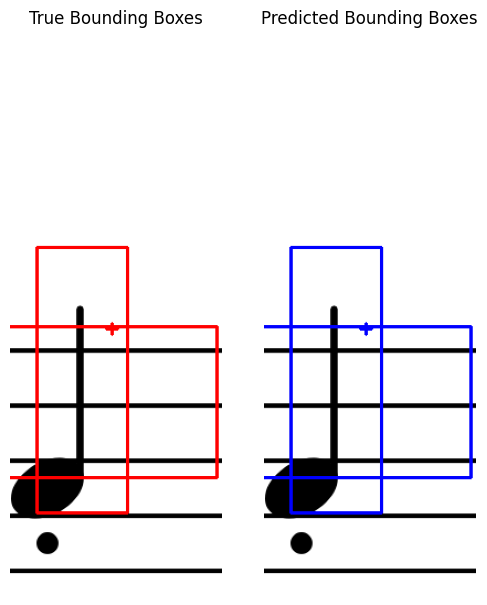

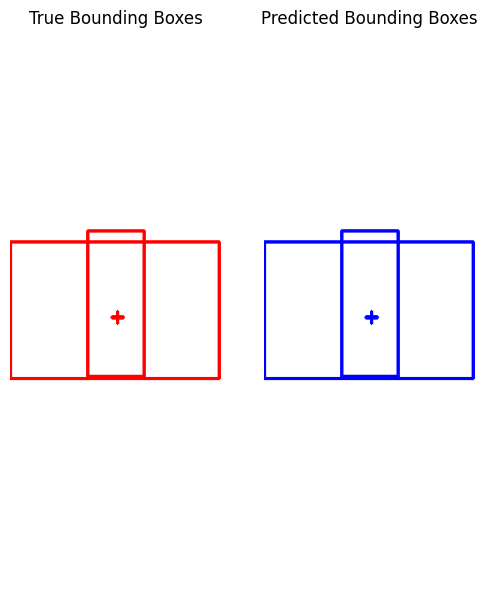

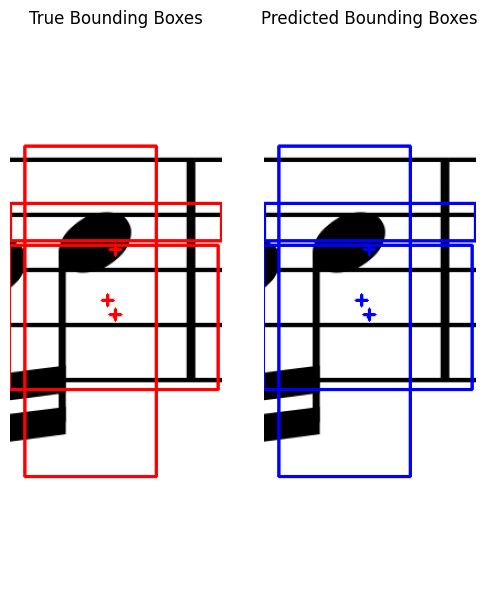

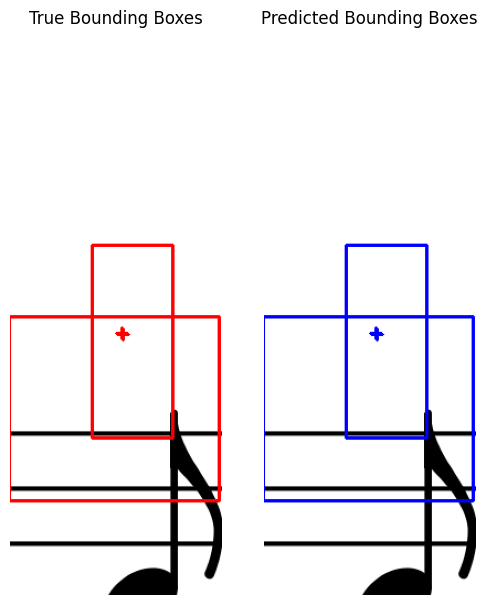

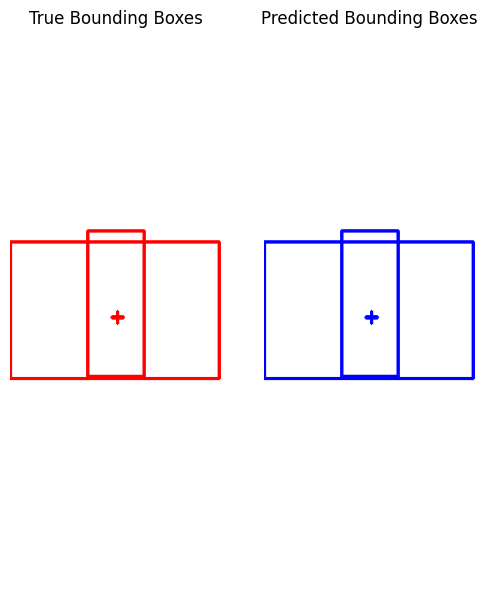

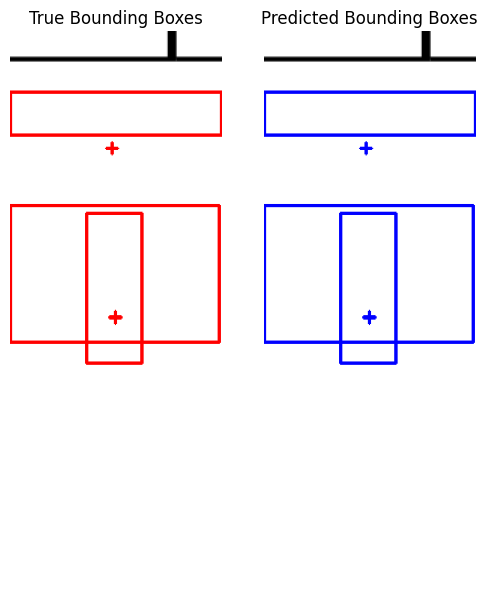

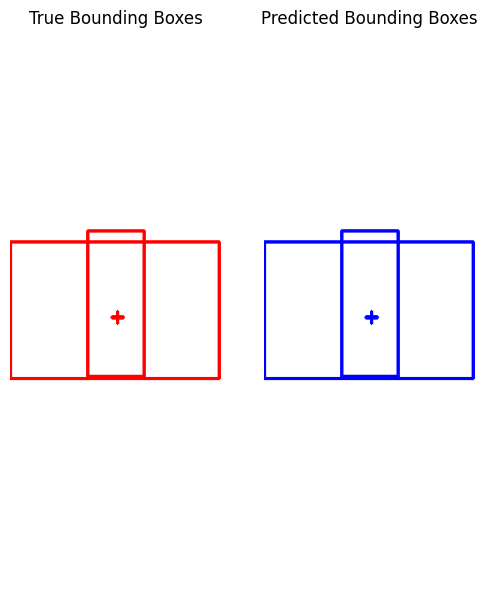

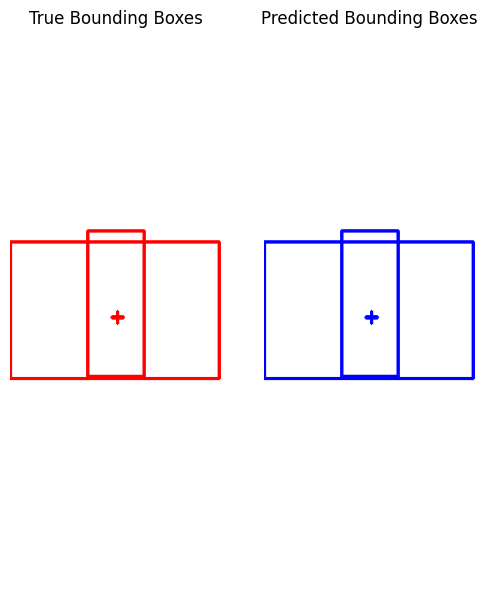

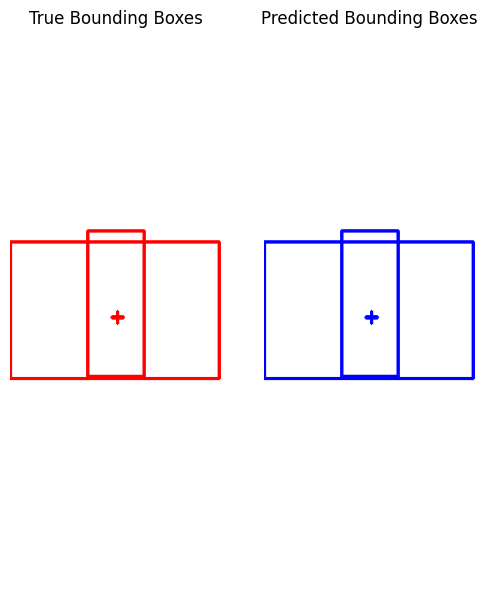

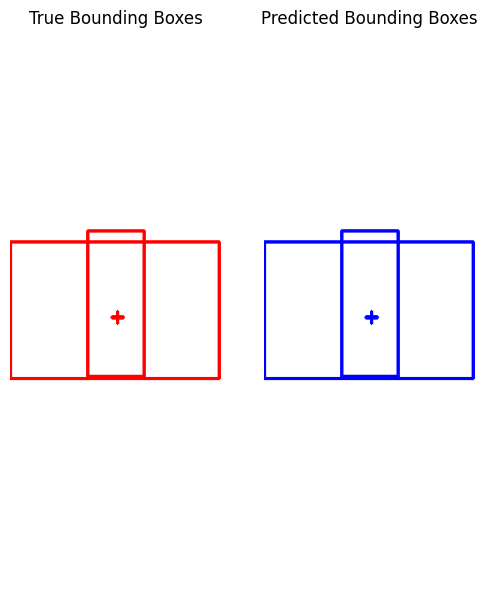

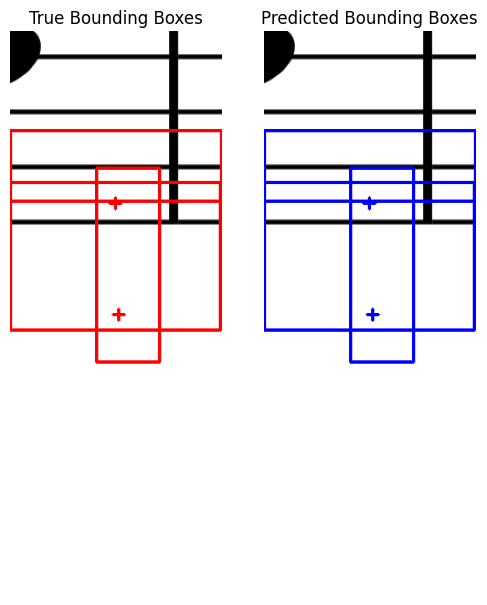

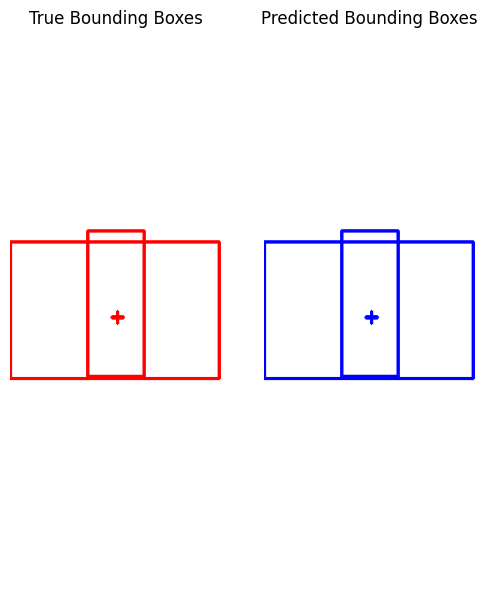

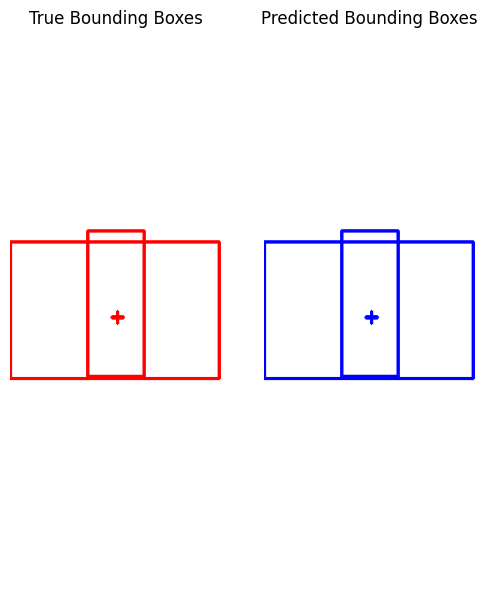

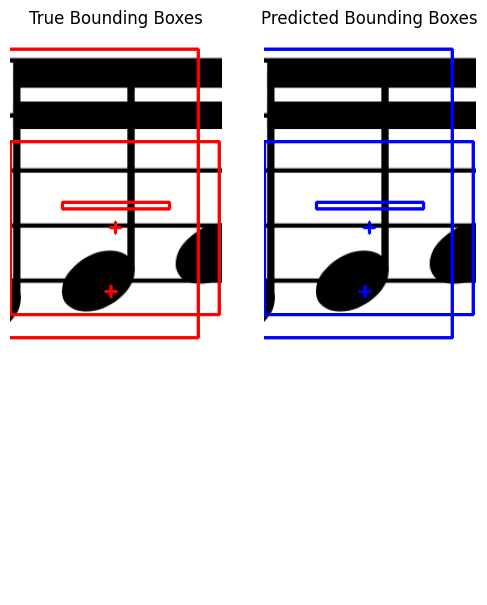

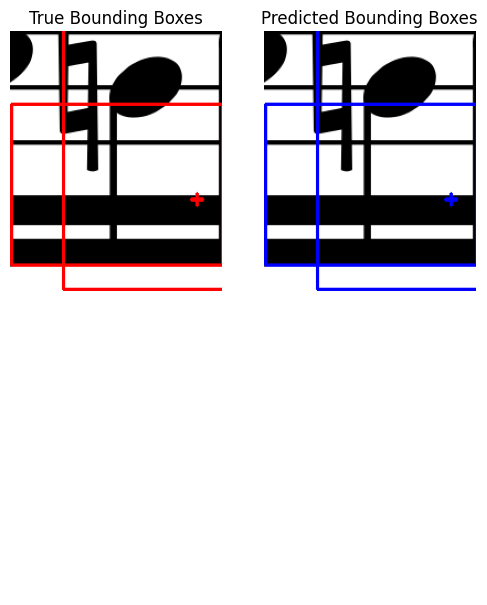

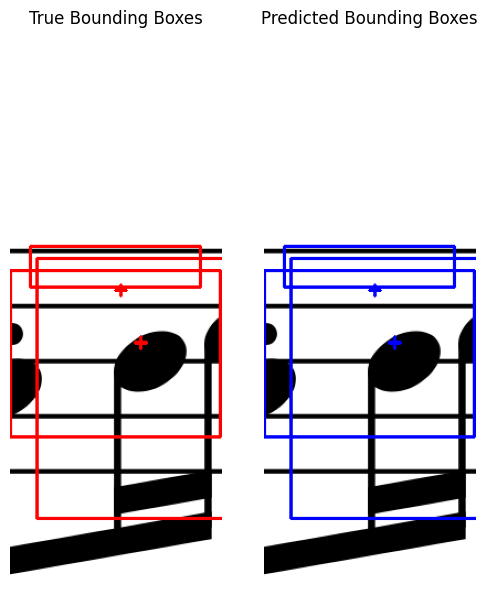

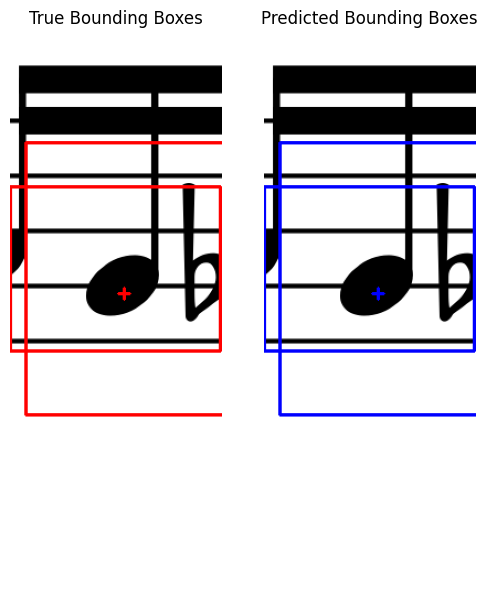

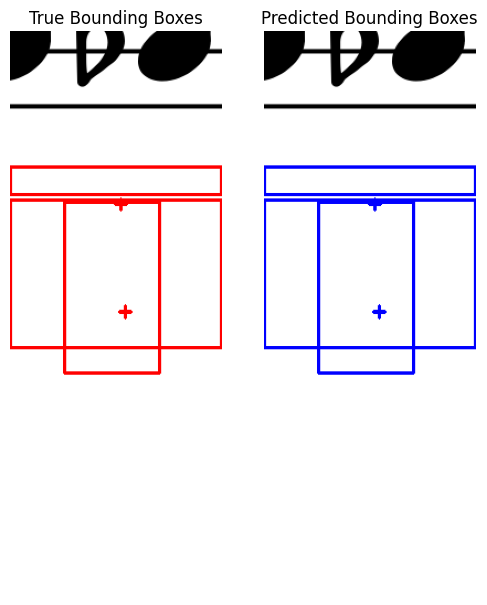

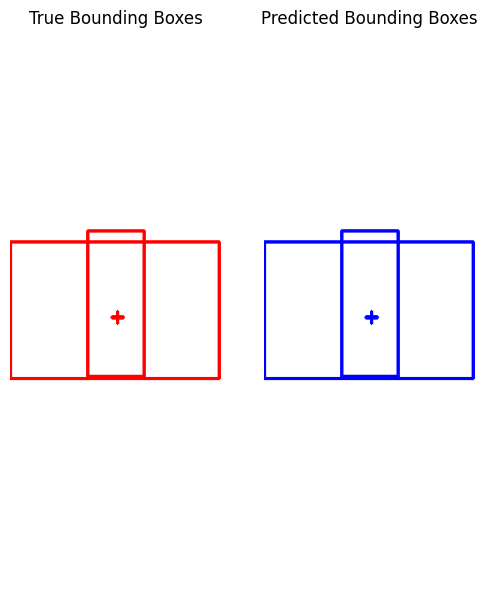

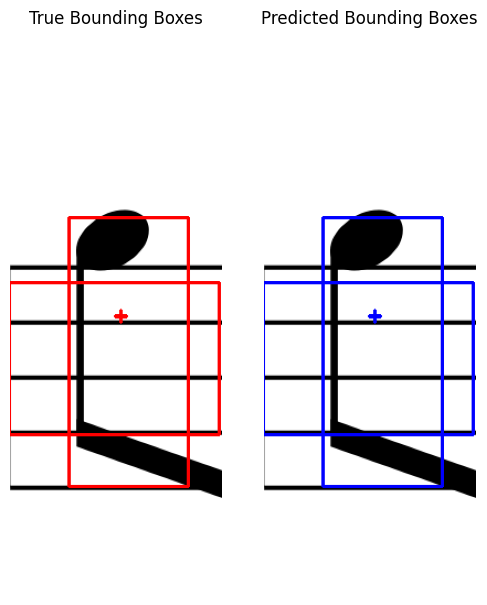

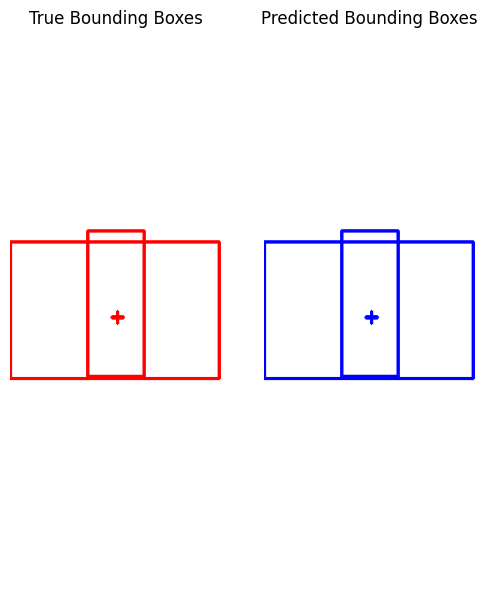

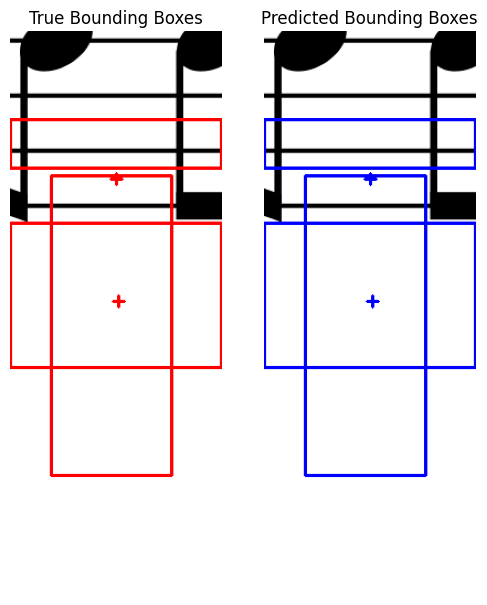

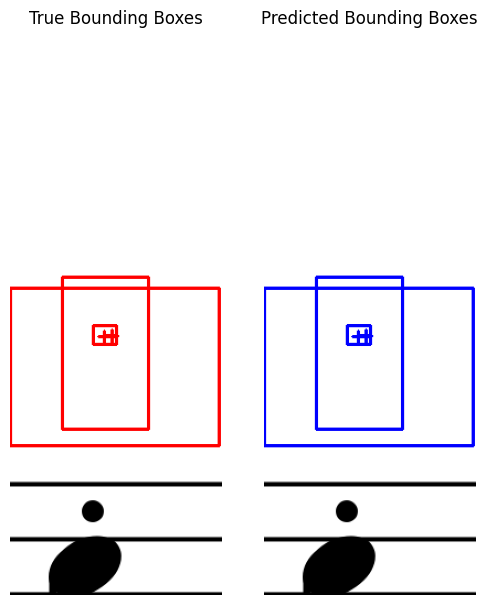

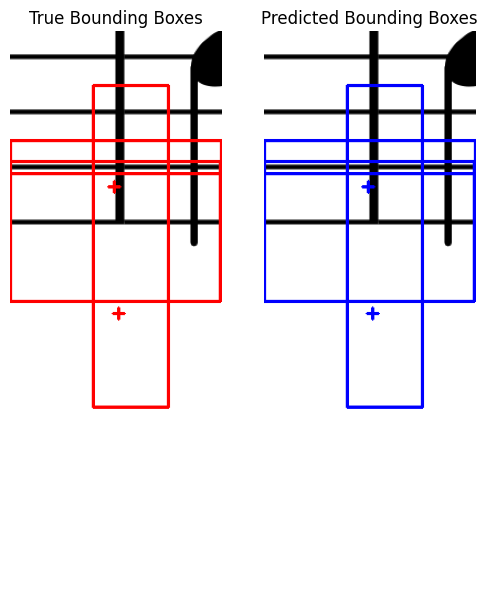

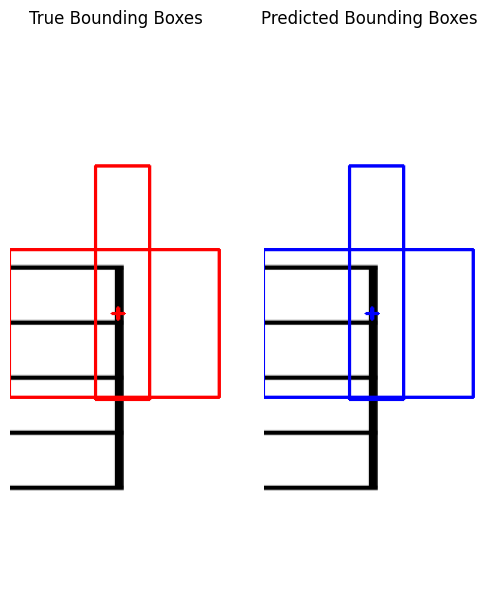

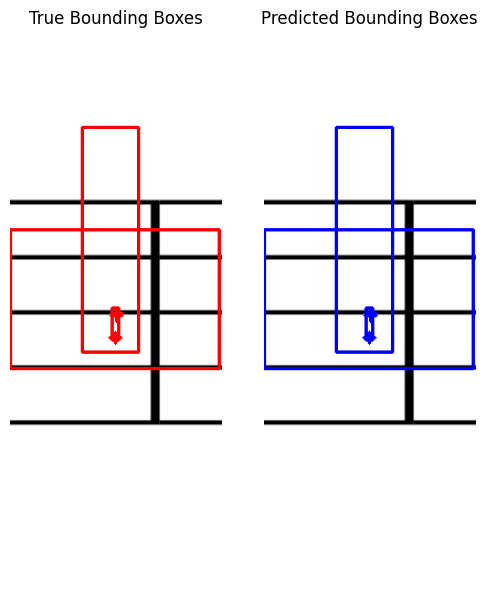

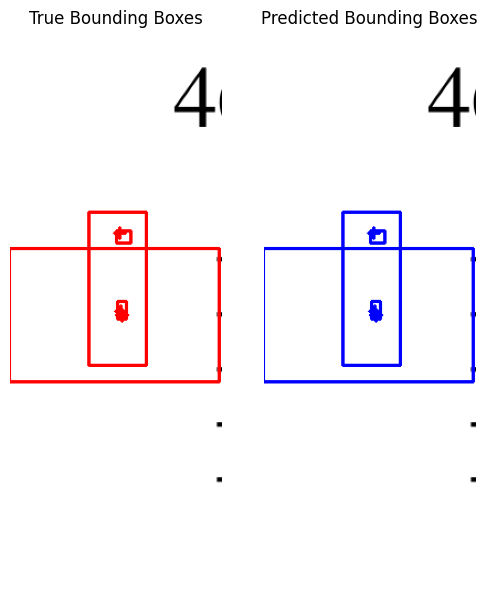

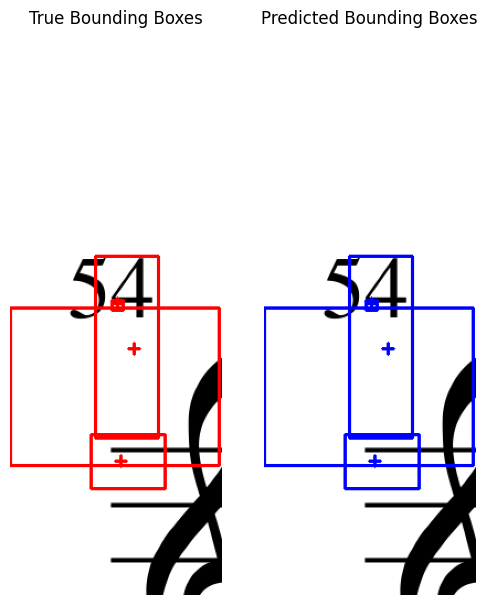

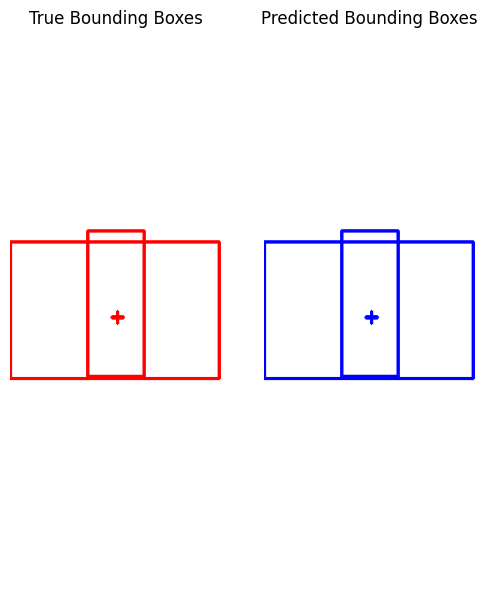

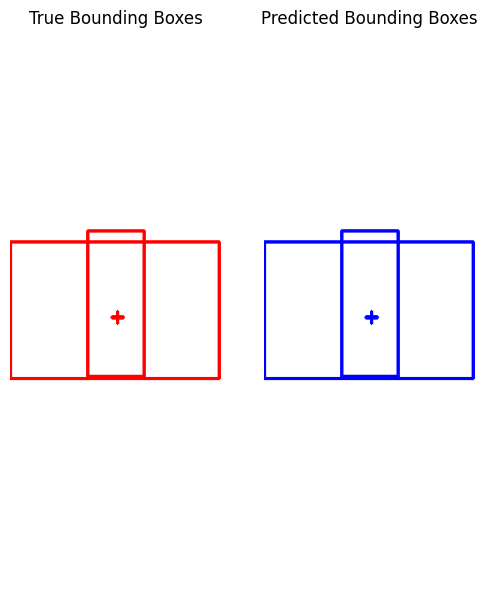

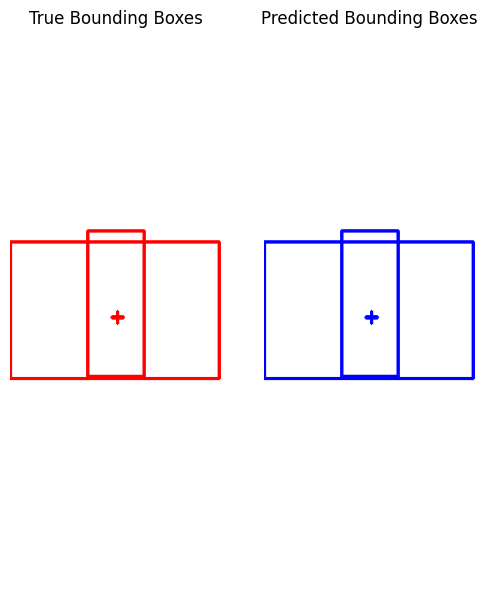

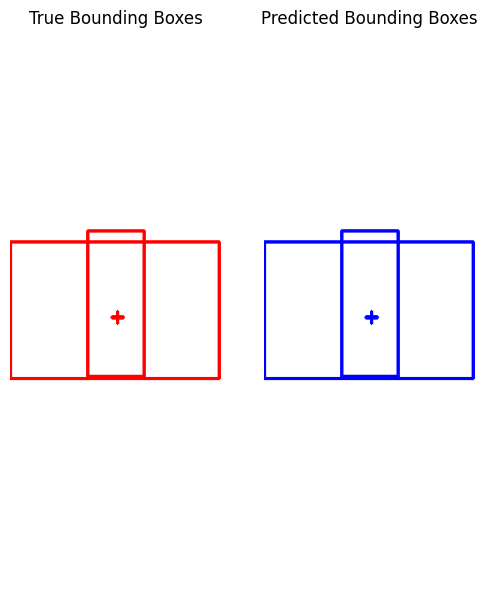

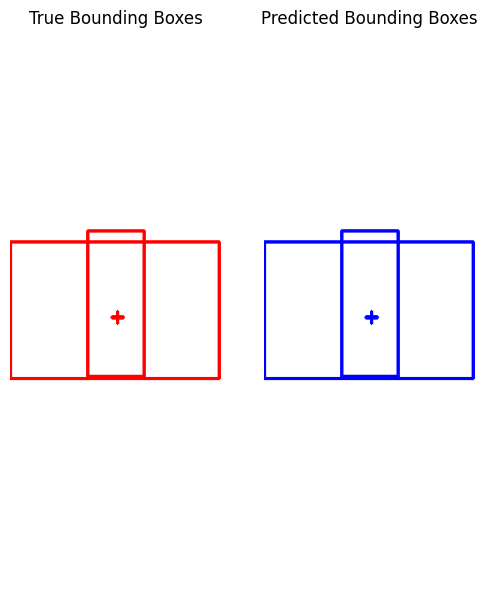

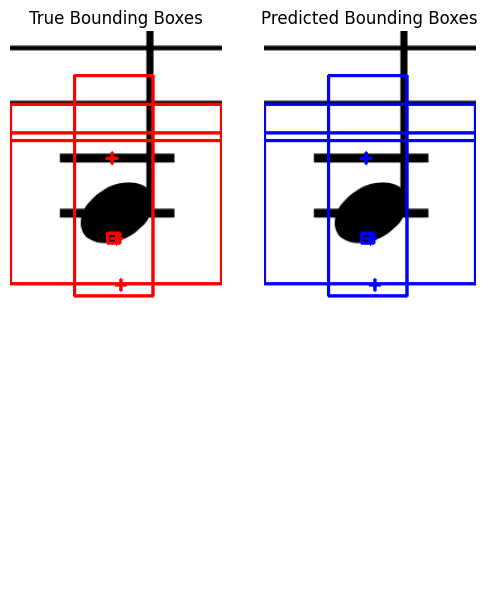

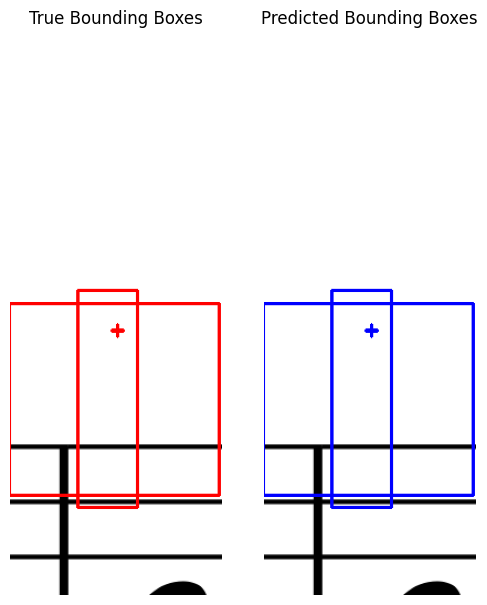

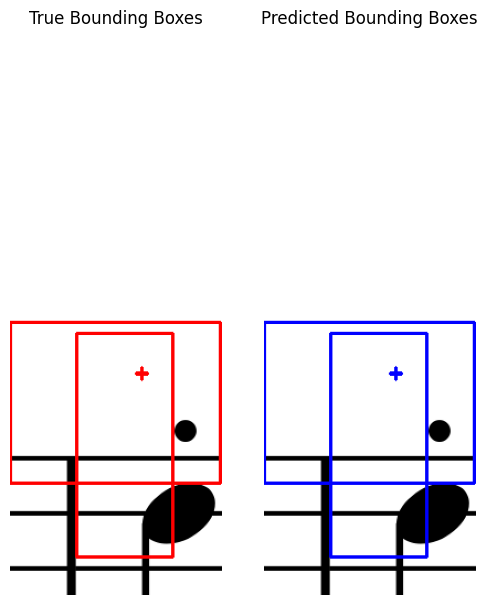

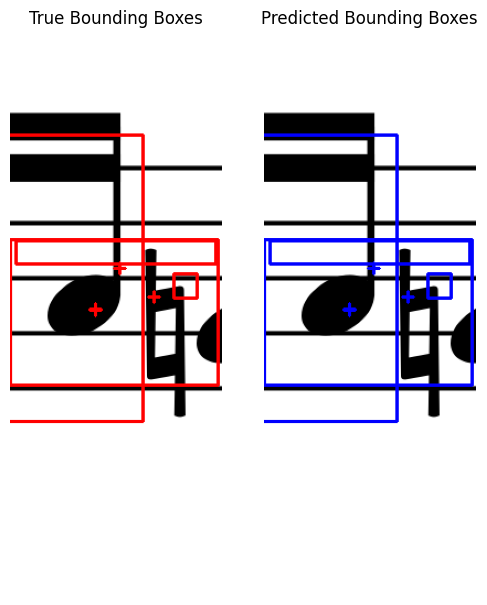

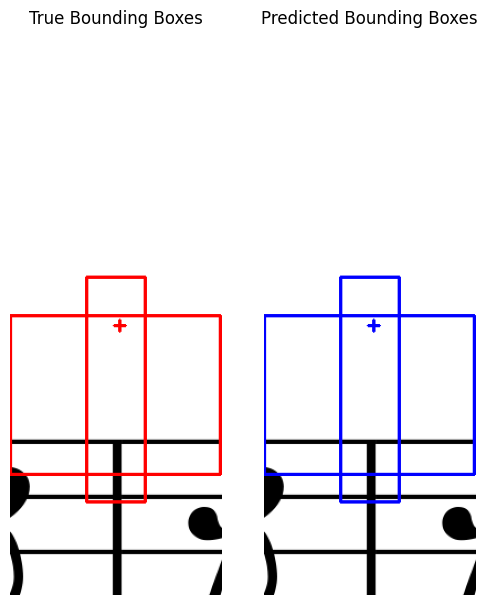

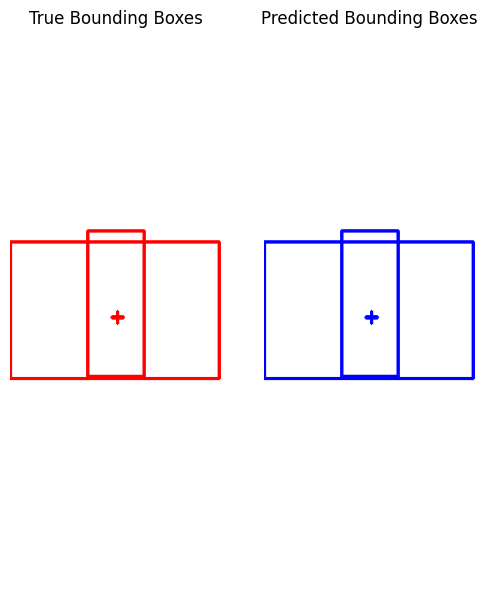

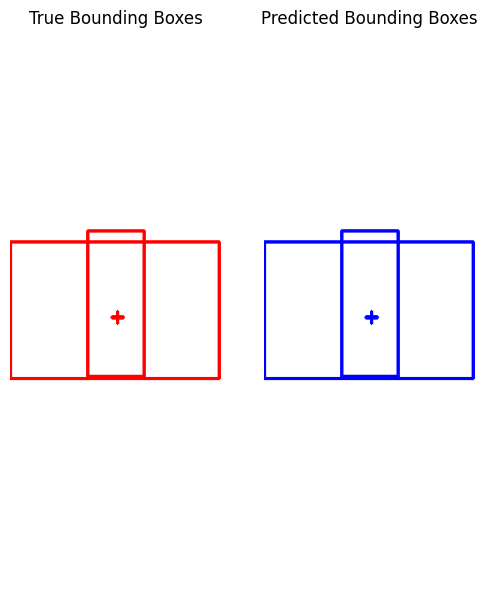

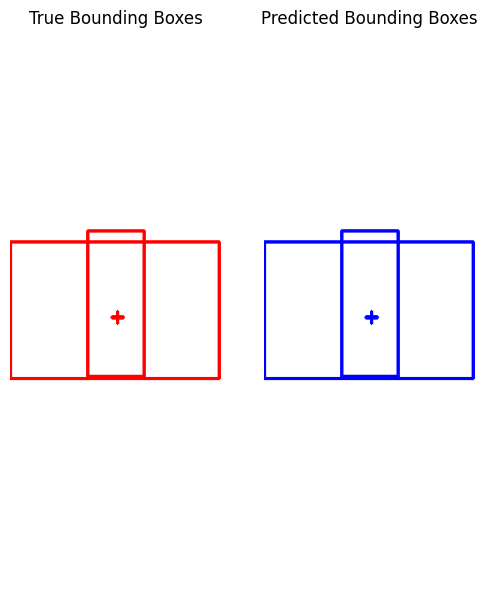

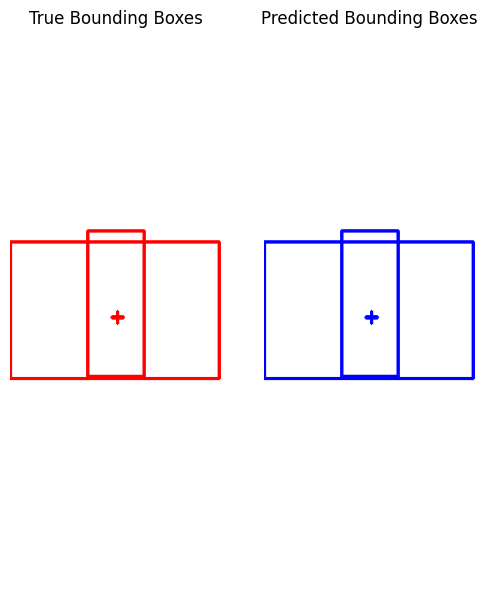

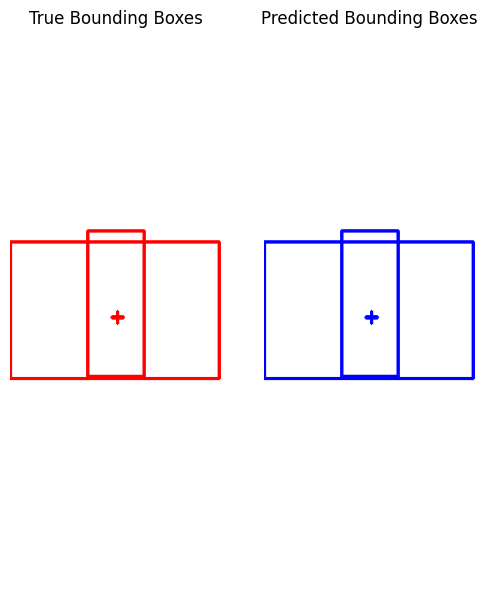

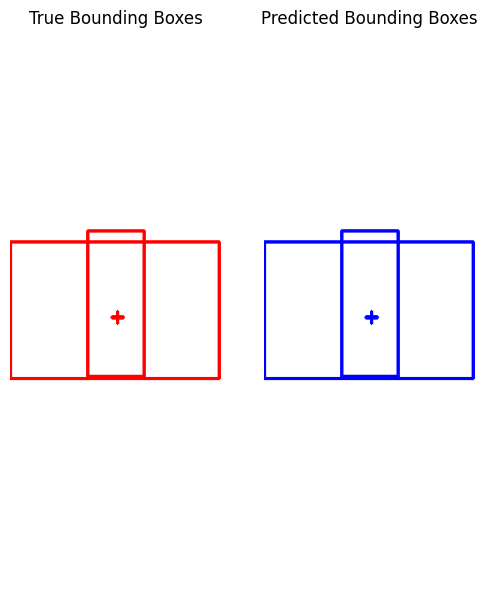

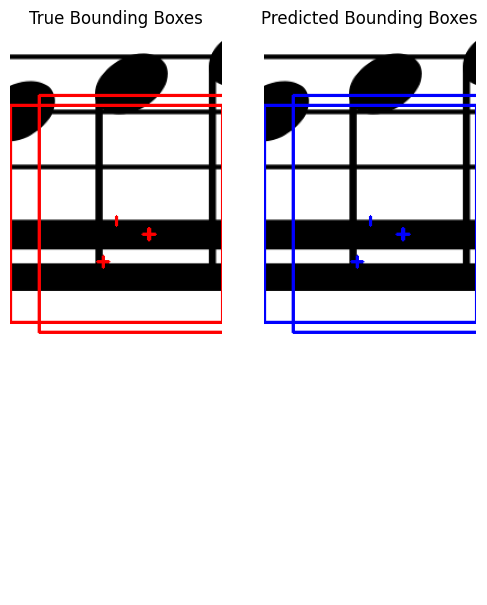

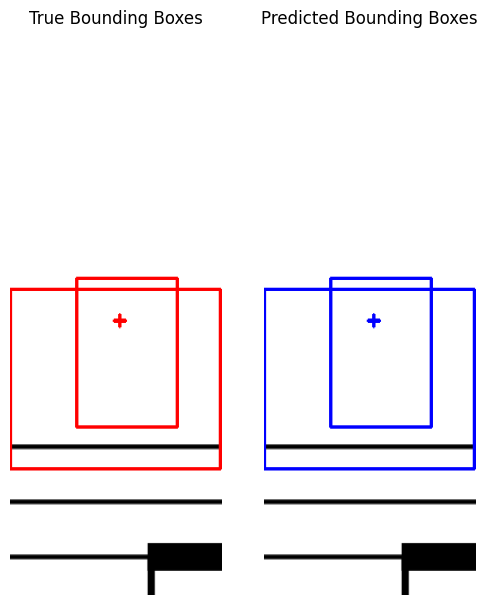

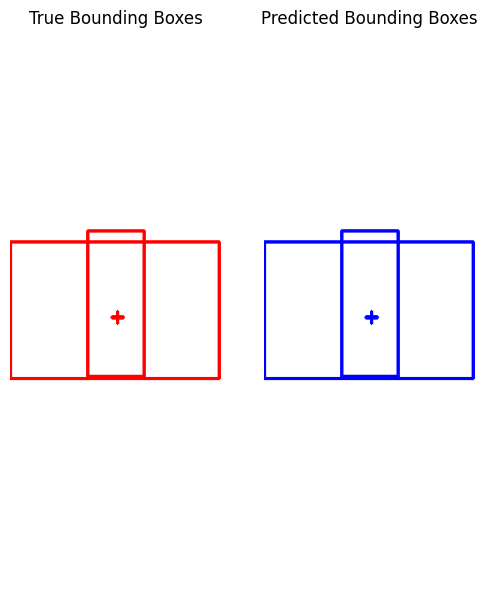

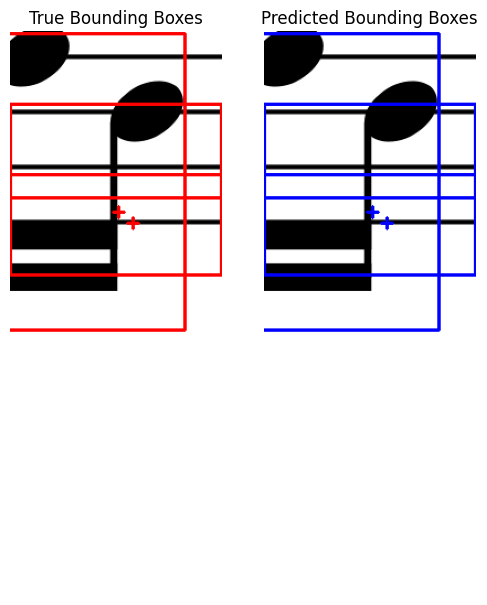

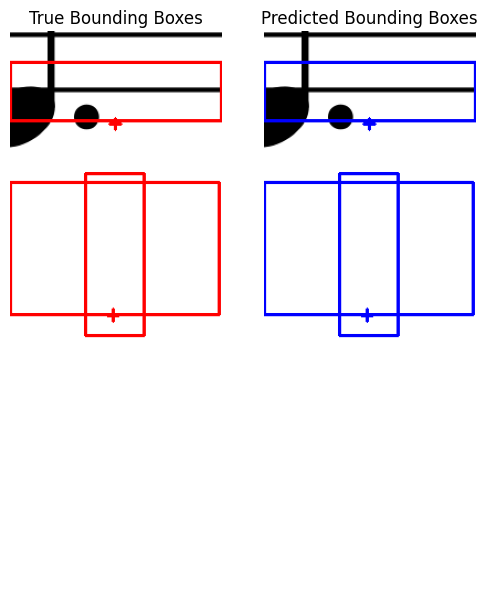

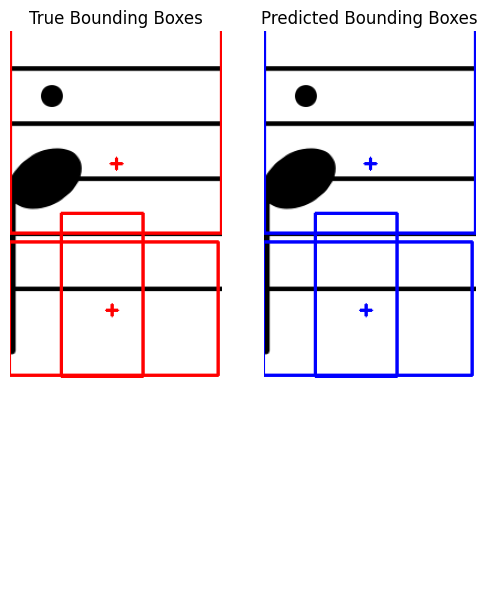

KeyboardInterrupt: 

In [30]:
for i in range(100):
    MSRL.datasets.preview(image[i:i+1, :, :, :], pred[i:i+1, :], pred[i:i+1, :])